In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import sympy as sp
import numpy as np
np.set_printoptions(suppress=True)

data = pd.read_csv(r"E:\参加点比赛\数模研赛\data\碳排预测数据.csv")
print(data.columns)
system = data.copy()

Index(['时间', '常驻人口总量', '区域生产总值', '一次能源中化石的能源消费量', '一次能源中非化石的能源消费量',
       '二次能源的能源消费量', '化石能源发电的能源消费量', '非化石能源发电的能源消费量', '农林消费部门的碳排放量',
       '工业消费部门的碳排放量', '交通消费部门的碳排放量', '建筑消费部门的碳排放量', '居民生活消费部门的碳排放量',
       '能源供应部门的碳排放量', '碳排放量'],
      dtype='object')


### 拟合得到人口、经济与时间x的关系

In [20]:
# 对经济做拟合
x = system['时间'].values.tolist()
GDP = system['区域生产总值'].values.tolist()
def fit_gdp(x, a, b): # 拟合函数
    return a * x + b
params, convariance = curve_fit(fit_gdp, x, GDP) # 将x、GDP放入fit_gdp中拟合
a, b = params # 获取拟合参数
x = sp.symbols('x') 
predict_gdp = a * x + b # 获取拟合方程式
print("经济关于时间的线性回归预测函数 = {}".format(predict_gdp))

# 对人口做拟合
# 做多项式拟合
x = system['时间'].values.tolist()
P = system['常驻人口总量'].values.tolist()
def fit_p_poly(x, a, b, c):
    return a * x**2 + b * x + c
params, convariance = curve_fit(fit_p_poly, x, P)
a, b, c = params
x = sp.symbols('x')
predict_p_poly = a * x**2 + b * x + c
print("人口关于时间的多项式回归预测函数 = {}".format(predict_p_poly))
# 做线性拟合
x = system['时间'].values.tolist()
P = system['常驻人口总量'].values.tolist()
def fit_p_linear(x, a, b): 
    return a * x + b
params, convariance = curve_fit(fit_p_linear, x, P)
a, b = params
x = sp.symbols('x')
predict_p_linear = a * x + b 
print("人口关于时间的线性回归预测函数 = {}".format(predict_p_linear))
# 组合预测
predict_p = 0.8 * predict_p_linear + 0.2 * predict_p_poly
print("人口关于时间的组合预测函数 = {}".format(predict_p))

print("已完成建立人口、经济与时间的预测函数"+"-"*100)
print("gdp(x) = {}".format(predict_gdp))
print("p(x) = {}".format(predict_p))

经济关于时间的线性回归预测函数 = 4873.30594129267*x - 9754168.45090928
人口关于时间的多项式回归预测函数 = -6.08892773946671*x**2 + 24596.2482445887*x - 24830690.1207832
人口关于时间的线性回归预测函数 = 57.8694545455782*x - 108334.379091145
人口关于时间的组合预测函数 = -1.21778554789334*x**2 + 4965.54521255419*x - 5052805.52742955
已完成建立人口、经济与时间的预测函数----------------------------------------------------------------------------------------------------
gdp(x) = 4873.30594129267*x - 9754168.45090928
p(x) = -1.21778554789334*x**2 + 4965.54521255419*x - 5052805.52742955


### 多元线性回归 得到五种能源消费量与人口、经济关系

In [21]:
# 选择自变量与应变量
GDPP = system.loc[:, ['区域生产总值', '常驻人口总量']].values # 自变量
EV1 = system['一次能源中化石的能源消费量'].values
EV2 = system['一次能源中非化石的能源消费量'].values
EV3 = system['二次能源的能源消费量'].values
EV4 = system['化石能源发电的能源消费量'].values
EV5 = system['非化石能源发电的能源消费量'].values

# 求解EV1关于GDP的线性回归方程
lr_EV1 = LinearRegression()
lr_EV1.fit(GDPP, EV1)
coef_EV1 = lr_EV1.coef_
intercept_EV1 = lr_EV1.intercept_
R2_EV1 = lr_EV1.score(GDPP, EV1)
print("EV1关于GDPP的方程求解完毕" + "-"*100)
print("相关系数 = ", coef_EV1)
print("截距 = ", intercept_EV1)
print("R2 = ", R2_EV1)

# 求解EV2关于GDP的线性回归方程
lr_EV2 = LinearRegression()
lr_EV2.fit(GDPP, EV2)
coef_EV2 = lr_EV2.coef_
intercept_EV2 = lr_EV2.intercept_
R2_EV2 = lr_EV2.score(GDPP, EV2)
print("EV2关于GDPP的方程求解完毕" + "-"*100)
print("相关系数 = ", coef_EV2)
print("截距 = ", intercept_EV2)
print("R2 = ", R2_EV2)

# 求解EV3关于GDP的线性回归方程
lr_EV3 = LinearRegression()
lr_EV3.fit(GDPP, EV3)
coef_EV3 = lr_EV3.coef_
intercept_EV3 = lr_EV3.intercept_
R2_EV3 = lr_EV3.score(GDPP, EV3)
print("EV3关于GDPP的方程求解完毕" + "-"*100)
print("相关系数 = ", coef_EV3)
print("截距 = ", intercept_EV3)
print("R2 = ", R2_EV3)

# 求解EV4关于GDP的线性回归方程
lr_EV4 = LinearRegression()
lr_EV4.fit(GDPP, EV4)
coef_EV4 = lr_EV4.coef_
intercept_EV4 = lr_EV4.intercept_
R2_EV4 = lr_EV4.score(GDPP, EV4)
print("EV4关于GDPP的方程求解完毕" + "-"*100)
print("相关系数 = ", coef_EV4)
print("截距 = ", intercept_EV4)
print("R2 = ", R2_EV4)

# 求解EV5关于GDP的线性回归方程
lr_EV5 = LinearRegression()
lr_EV5.fit(GDPP, EV5)
coef_EV5 = lr_EV5.coef_
intercept_EV5 = lr_EV5.intercept_
R2_EV5 = lr_EV5.score(GDPP, EV5)
print("EV5关于GDPP的方程求解完毕" + "-"*100)
print("相关系数 = ", coef_EV5)
print("截距 = ", intercept_EV5)
print("R2 = ", R2_EV5)

EV1关于GDPP的方程求解完毕----------------------------------------------------------------------------------------------------
相关系数 =  [-0.03661372 11.88155067]
截距 =  -68502.65465777054
R2 =  0.8964809089513421
EV2关于GDPP的方程求解完毕----------------------------------------------------------------------------------------------------
相关系数 =  [-0.00017163  0.3853916 ]
截距 =  -2877.963175785708
R2 =  0.9406574536312785
EV3关于GDPP的方程求解完毕----------------------------------------------------------------------------------------------------
相关系数 =  [ 0.06141583 -2.10788562]
截距 =  14766.760473862283
R2 =  0.9814537787407255
EV4关于GDPP的方程求解完毕----------------------------------------------------------------------------------------------------
相关系数 =  [-0.04767989  8.27075935]
截距 =  -53097.66348118112
R2 =  0.8016486185647343
EV5关于GDPP的方程求解完毕----------------------------------------------------------------------------------------------------
相关系数 =  [ 0.06141583 -2.10788562]
截距 =  14766.760473862283
R2 =  0.981453778740

### 多元线性回归 得到六个部门碳排放量与五种能源消费量关系

In [22]:
system.columns

Index(['时间', '常驻人口总量', '区域生产总值', '一次能源中化石的能源消费量', '一次能源中非化石的能源消费量',
       '二次能源的能源消费量', '化石能源发电的能源消费量', '非化石能源发电的能源消费量', '农林消费部门的碳排放量',
       '工业消费部门的碳排放量', '交通消费部门的碳排放量', '建筑消费部门的碳排放量', '居民生活消费部门的碳排放量',
       '能源供应部门的碳排放量', '碳排放量'],
      dtype='object')

In [23]:
# 选择自变量与应变量
Eall = system.loc[:, ['一次能源中化石的能源消费量', '一次能源中非化石的能源消费量', '二次能源的能源消费量', '化石能源发电的能源消费量',
       '非化石能源发电的能源消费量']]
CO2D1 = system['农林消费部门的碳排放量'].values
CO2D2 = system['工业消费部门的碳排放量'].values
CO2D3 = system['交通消费部门的碳排放量'].values
CO2D4 = system['建筑消费部门的碳排放量'].values
CO2D5 = system['居民生活消费部门的碳排放量'].values
CO2D6 = system['能源供应部门的碳排放量'].values
CO2 = system['碳排放量'].values

# 求解CO2D1关于五种能源的方程
lr_CO2D1 = LinearRegression()
lr_CO2D1.fit(Eall, CO2D1)
coef_CO2D1 = lr_CO2D1.coef_
intercept_CO2D1 = lr_CO2D1.intercept_
R2_CO2D1 = lr_CO2D1.score(Eall, CO2D1)
print("CO2D1关于Eall的方程求解完毕" + "-"*100)
print("相关系数 = ")
for i in coef_CO2D1:
    print(i)
print("截距 = ", intercept_CO2D1)
print("R2 = ", R2_CO2D1)

# 求解CO2D2关于五种能源的方程
lr_CO2D2 = LinearRegression()
lr_CO2D2.fit(Eall, CO2D2)
coef_CO2D2 = lr_CO2D2.coef_
intercept_CO2D2 = lr_CO2D2.intercept_
R2_CO2D2 = lr_CO2D2.score(Eall, CO2D2)
print("CO2D2关于Eall的方程求解完毕" + "-"*100)
print("相关系数 = ")
for i in coef_CO2D2:
    print(i)
print("截距 = ", intercept_CO2D2)
print("R2 = ", R2_CO2D2)

# 求解CO2D3关于五种能源的方程
lr_CO2D3 = LinearRegression()
lr_CO2D3.fit(Eall, CO2D3)
coef_CO2D3 = lr_CO2D3.coef_
intercept_CO2D3 = lr_CO2D3.intercept_
R2_CO2D3 = lr_CO2D3.score(Eall, CO2D3)
print("CO2D3关于Eall的方程求解完毕" + "-"*100)
print("相关系数 = ")
for i in coef_CO2D3:
    print(i)
print("截距 = ", intercept_CO2D3)
print("R2 = ", R2_CO2D3)

# 求解CO2D4关于五种能源的方程
lr_CO2D4 = LinearRegression()
lr_CO2D4.fit(Eall, CO2D4)
coef_CO2D4 = lr_CO2D4.coef_
intercept_CO2D4 = lr_CO2D4.intercept_
R2_CO2D4 = lr_CO2D4.score(Eall, CO2D4)
print("CO2D4关于Eall的方程求解完毕" + "-"*100)
print("相关系数 = ")
for i in coef_CO2D4:
    print(i)
print("截距 = ", intercept_CO2D4)
print("R2 = ", R2_CO2D4)

# 求解CO2D5关于五种能源的方程
lr_CO2D5 = LinearRegression()
lr_CO2D5.fit(Eall, CO2D5)
coef_CO2D5 = lr_CO2D5.coef_
intercept_CO2D5 = lr_CO2D5.intercept_
R2_CO2D5 = lr_CO2D5.score(Eall, CO2D5)
print("CO2D5关于Eall的方程求解完毕" + "-"*100)
print("相关系数 = ")
for i in coef_CO2D5:
    print(i)
print("截距 = ", intercept_CO2D5)
print("R2 = ", R2_CO2D5)

# 求解CO2D6关于五种能源的方程
lr_CO2D6 = LinearRegression()
lr_CO2D6.fit(Eall, CO2D6)
coef_CO2D6 = lr_CO2D6.coef_
intercept_CO2D6 = lr_CO2D6.intercept_
R2_CO2D6 = lr_CO2D6.score(Eall, CO2D6)
print("CO2D6关于Eall的方程求解完毕" + "-"*100)
print("相关系数 = ")
for i in coef_CO2D6:
    print(i)
print("截距 = ", intercept_CO2D6)
print("R2 = ", R2_CO2D6)



CO2D1关于Eall的方程求解完毕----------------------------------------------------------------------------------------------------
相关系数 = 
0.07111766163420245
-0.4533204721373662
0.02807295234977725
-0.010897374892094176
0.028072952349775807
截距 =  -614.31332011273
R2 =  0.870690628265383
CO2D2关于Eall的方程求解完毕----------------------------------------------------------------------------------------------------
相关系数 = 
3.047549180811372
-26.921953181034546
-0.7094094765940194
-1.3189601926973173
-0.7094094765941011
截距 =  -5425.175780223377
R2 =  0.9225385342706047
CO2D3关于Eall的方程求解完毕----------------------------------------------------------------------------------------------------
相关系数 = 
0.06592956771543339
3.451222646614744
0.4020854886855152
-0.005133976072070779
0.4020854886855256
截距 =  474.641647489595
R2 =  0.9917494790951056
CO2D4关于Eall的方程求解完毕----------------------------------------------------------------------------------------------------
相关系数 = 
-0.03316570976849859
-2.5897721443060213
0.69908

### 计算得到CO2的方程

In [24]:
predict_EV1 = coef_EV1[0] * predict_gdp + coef_EV1[1] * predict_p + intercept_EV1
predict_EV2 = coef_EV2[0] * predict_gdp + coef_EV2[1] * predict_p + intercept_EV2
predict_EV3 = coef_EV3[0] * predict_gdp + coef_EV3[1] * predict_p + intercept_EV3
predict_EV4 = coef_EV4[0] * predict_gdp + coef_EV4[1] * predict_p + intercept_EV4
predict_EV5 = coef_EV5[0] * predict_gdp + coef_EV5[1] * predict_p + intercept_EV5

predict_CO2D1 = coef_CO2D1[0] * predict_EV1 + \
                coef_CO2D1[1] * predict_EV2 + \
                coef_CO2D1[2] * predict_EV3 + \
                coef_CO2D1[3] * predict_EV4 + \
                coef_CO2D1[4] * predict_EV5 + intercept_CO2D1

predict_CO2D2 = coef_CO2D2[0] * predict_EV1 + \
                coef_CO2D2[1] * predict_EV2 + \
                coef_CO2D2[2] * predict_EV3 + \
                coef_CO2D2[3] * predict_EV4 + \
                coef_CO2D2[4] * predict_EV5 + intercept_CO2D2

predict_CO2D3 = coef_CO2D3[0] * predict_EV1 + \
                coef_CO2D3[1] * predict_EV2 + \
                coef_CO2D3[2] * predict_EV3 + \
                coef_CO2D3[3] * predict_EV4 + \
                coef_CO2D3[4] * predict_EV5 + intercept_CO2D3

predict_CO2D4 = coef_CO2D4[0] * predict_EV1 + \
                coef_CO2D4[1] * predict_EV2 + \
                coef_CO2D4[2] * predict_EV3 + \
                coef_CO2D4[3] * predict_EV4 + \
                coef_CO2D4[4] * predict_EV5 + intercept_CO2D4

predict_CO2D5 = coef_CO2D5[0] * predict_EV1 + \
                coef_CO2D5[1] * predict_EV2 + \
                coef_CO2D5[2] * predict_EV3 + \
                coef_CO2D5[3] * predict_EV4 + \
                coef_CO2D5[4] * predict_EV5 + intercept_CO2D5

predict_CO2D6 = coef_CO2D6[0] * predict_EV1 + \
                coef_CO2D6[1] * predict_EV2 + \
                coef_CO2D6[2] * predict_EV3 + \
                coef_CO2D6[3] * predict_EV4 + \
                coef_CO2D6[4] * predict_EV5 + intercept_CO2D6

predict_CO2 = predict_CO2D1 + predict_CO2D2 + predict_CO2D3 + predict_CO2D4 + predict_CO2D5 + predict_CO2D6

print("五种能源消费量关于时间" + "-"*100)
print("EV1(x) = ", predict_EV1)
print("EV2(x) = ", predict_EV2)
print("EV3(x) = ", predict_EV3)
print("EV4(x) = ", predict_EV4)
print("EV5(x) = ", predict_EV5)
print("六个部门能耗关于时间" + "-"*100)
print("CO2D1(x) = ", predict_CO2D1)
print("CO2D2(x) = ", predict_CO2D2)
print("CO2D3(x) = ", predict_CO2D3)
print("CO2D4(x) = ", predict_CO2D4)
print("CO2D5(x) = ", predict_CO2D5)
print("CO2D6(x) = ", predict_CO2D6)
print("总能耗关于时间" + "-"*100)
print("CO2(x) = ", predict_CO2)

五种能源消费量关于时间----------------------------------------------------------------------------------------------------
EV1(x) =  -14.4691806933183*x**2 + 58819.9472059816*x - 59746531.1947759
EV2(x) =  -0.469324319939295*x**2 + 1912.84299907292*x - 1948512.64569116
EV3(x) =  2.56695265023286*x**2 - 10167.5032464289*x + 10066442.5519702
EV4(x) =  -10.0720112056623*x**2 + 40836.4708214353*x - 41378558.5840887
EV5(x) =  2.56695265023286*x**2 - 10167.5032464289*x + 10066442.5519702
六个部门能耗关于时间----------------------------------------------------------------------------------------------------
CO2D1(x) =  -0.562377613477402*x**2 + 2300.13221115463*x - 2350240.04056542
CO2D2(x) =  -21.8178716322244*x**2 + 88323.3791481631*x - 89333939.0350974
CO2D3(x) =  -0.457711263758086*x**2 + 2093.55628298492*x - 2355761.82721045
CO2D4(x) =  1.18003854878224*x**2 - 4479.76279145293*x + 4239714.58311904
CO2D5(x) =  1.61975061546172*x**2 - 6192.82019374946*x + 5907905.53023828
CO2D6(x) =  -7.81202025116154*x**2 + 3

### 预测六个部门碳排放量、总碳排放量

In [25]:
# 新建预测结果
system_pre = pd.DataFrame({'时间': [i for i in range(2010, 2061)]})
system_pre['农林消费部门的碳排放量预测值'] = 99
system_pre['农林消费部门的碳排放量预测值'] = 99
system_pre['农林消费部门的碳排放量预测值'] = 99
system_pre['农林消费部门的碳排放量预测值'] = 99
system_pre['农林消费部门的碳排放量预测值'] = 99
system_pre['农林消费部门的碳排放量预测值'] = 99
system_pre['碳排放量预测值'] = 99

# 预测
for i in range(system_pre.shape[0]):
    t = system_pre.loc[i, ['时间']][0] # 获取第i个时间
    system_pre.loc[i, ['农林消费部门的碳排放量预测值']] = predict_CO2D1.subs(x, t)
    system_pre.loc[i, ['工业消费部门的碳排放量预测值']] = predict_CO2D2.subs(x, t)
    system_pre.loc[i, ['交通消费部门的碳排放量预测值']] = predict_CO2D3.subs(x, t)
    system_pre.loc[i, ['建筑消费部门的碳排放量预测值']] = predict_CO2D4.subs(x, t)
    system_pre.loc[i, ['居民生活消费的碳排放量预测值']] = predict_CO2D5.subs(x, t)
    system_pre.loc[i, ['能源供应部门的碳排放量预测值']] = predict_CO2D6.subs(x, t)
    system_pre.loc[i, ['碳排放量预测值']] = predict_CO2.subs(x, t)

### 绘图碳排放量结果

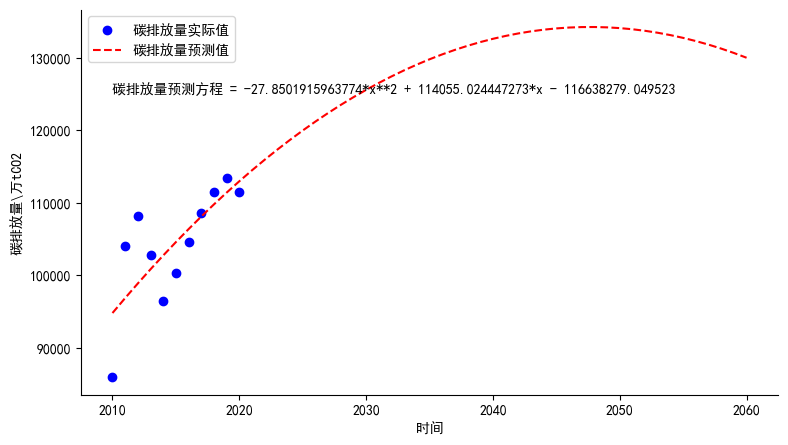

In [26]:
# 绘制原始曲线、两条拟合结果
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(9, 5))
(ax) = fig.subplots(1, 1)

ax.scatter(system['时间'], system['碳排放量'], c='b', label='碳排放量实际值')
ax.plot(system_pre['时间'], system_pre['碳排放量预测值'], c='r', linestyle='--', label='碳排放量预测值')
ax.text(system_pre['时间'][0], 125000, "碳排放量预测方程 = {}".format(predict_CO2))

ax.set_xlabel('时间')
ax.set_ylabel('碳排放量\万tCO2')
ax.spines['right'].set_color(None) 
ax.spines['top'].set_color(None) 
ax.legend()

plt.savefig(r"E:\参加点比赛\数模研赛\results\T2\碳排放量预测图.jpg", dpi=500)
system_pre.to_csv(r"E:\参加点比赛\数模研赛\results\T2\碳排放量预测表.csv", encoding='utf-8-sig', index=False)